<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/feature_crosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ডিপ লার্নিং কেন? নন-লিনিয়ার সমস্যা, ফিচার ক্রস

এই প্রশ্নটা প্রায় অনেকেই করেন, মেশিন লার্নিং থাকতে ডিপ লার্নিং কেন দরকার পড়লো? এর উত্তর সবার জানা, তবে যে জন্য আমি ডিপ লার্নিংয়ে এসেছি সেটা আলাপ করি বরং। আমার একটা সমস্যা হচ্ছে, যে কোন ডাটা পেলেই সেটাকে আগে কাগজে প্লট করে ফেলি। তাহলে সেটা বুঝতে সুবিধা হয়। 

মনে আছে আমাদের আইরিশ ডাটা সেটের কথা? সেখানে সবগুলো প্রজাতির ডাটাকে প্লট করলে কিছুটা এরকম দেখা যেত। তিন প্রজাতিকে ছবির মধ্যে আলাদা করা খুব একটা সমস্যা ছিল না। কারণ তিনটা ছবির মধ্যে দুটো লাইন বা সরলরেখা টানলেই কিন্তু তিনটা প্রজাতিকে আলাদা করে ফেলা যেত। এক পিকচার থেকে আরেক পিকচারের ডিসিশন সারফেস এবং ডিসিশন বাউন্ডারি সরলরেখার। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/iris.png" alt="আইরিশ ডেটাসেটের ডিসিশন বাউন্ডারি"> চিত্রঃ আইরিশ ডেটাসেটের ডিসিশন বাউন্ডারি

---
এখানে ইচ্ছেমতো সাইকিট-লার্ন এবং টেন্সর-ফ্লো ব্যবহার করছি কাজের সুবিধার্থে। কখন কোনটা কাজে লাগে সেটা জানবেন নিজে নিজে।


## দুটো ফিচার নিয়ে আইরিশ ডেটাসেটকে প্লট করি

সরল রেখায় ডিসিশন সারফেস/বাউন্ডারি বানানো যায় সহজে। কোড কমানোর জন্য 'plot_decision_regions' নামের একটা হেলপার ফাংশন ব্যবহার করি।

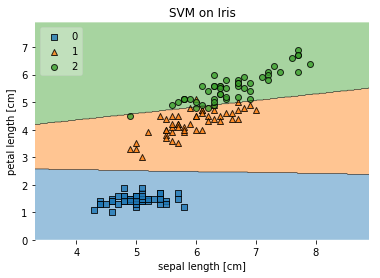

In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

# দুটো ফিচার নিচ্ছি
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# ক্লাসিফায়ার ট্রেনিং করছি
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# প্লট করছি নতুন লাইব্রেরি দিয়ে
plot_decision_regions(X, y, clf=svm, legend=2)

# দু পাশের লেখাগুলো সেট করছি
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

বয়সের সাথে ওজন বাড়বে, বাড়ি স্কয়ার ফিট এর সাথে দাম বাড়বে, এধরনের লিনিয়ার সম্পর্কগুলোতে ডাটাকে প্লট করলে সেগুলোকে সোজা লাইন দিয়ে আলাদা করে দেখা যায় সহজে। কিন্তু ডাটা যদি এমন হয়? কিভাবে একটা লাইন দিয়ে দুটো ফিচারকে ভাগ করবেন?

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/fc1.png" alt="নন-লিনিয়ার ক্লাসিফিকেশন সমস্যা"> 

চিত্রঃ নন-লিনিয়ার ক্লাসিফিকেশন সমস্যা 

এটা নন-লিনিয়ার ক্লাসিফিকেশন সমস্যা। নন-লিনিয়ার এর সমস্যা হচ্ছে তাদের 'ডিসিশন সারফেস' সরলরেখা নয়। এই ছবিতে যদি দুটো ফিচার থাকে তাহলে সেটা দিয়ে এই সমস্যার সমাধান করা সম্ভব নয়। সেটার জন্য প্রয়োজন ফিচার ক্রস। মানে এই নতুন ফিচার কয়েকটা ফিচার স্পেসের গুণফলের আউটকাম নন-লিনিয়ারিটিকে এনকোড করে মানে আরেকটা সিনথেটিক ফিচার তৈরি করে সেটার মাধ্যমে এই নন-লিনিয়ারিটিকে কিছুটা ডিল করা যায়। ক্রস এসেছে ক্রস প্রোডাক্ট থেকে। এখানে x1 = x2x3 (সাবস্ক্রিপ্ট হবে)

## একটা নন-লিনিয়ারিটির উদাহরণ দেখি আসল ডেটা থেকে

In [0]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

## ভার্সন চেক করি

In [3]:
sklearn.__version__

'0.21.3'

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  # শুধুমাত্র জুপিটার নোটবুক/কোলাবে চেষ্টা করবো টেন্সর-ফ্লো ২.০ এর জন্য
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


## ১. ডেটাকে আমরা লোড করে সেটাকে ট্রেইন এবং টেস্টসেটে ভাগ করি 

ধরুন আপনি ডাটা প্লট করে দেখলেন এই অবস্থা। কি করবেন? নিচের ছবি দেখুন। এই ডাটাসেটে অক্ষাংশ, দ্রাঘিমাংশ, ভূমির উচ্চতা ইত্যাদি আছে। আমরা সবগুলোর মধ্যে শুধুমাত্র অক্ষাংশ, দ্রাঘিমাংশ প্লট করছি। দেখুন কি অবস্থা। একটা ফিচার ভেতরে আরেকটা ঘিরে রয়েছে সেটাকে চারপাশ দিয়ে। এখন কিভাবে এদুটোকে আলাদা করবেন? সোজা লাইন টেনে সম্ভব না। শুরুতে চেষ্টা করি সাপোর্ট ভেক্টর মেশিন, এরপর নিউরাল নেটওয়ার্ক দিয়ে।  

In [0]:
# df = pd.read_csv('geoloc_elev.csv')
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')

# আমাদের দুটো ফিচার হলেই যথেষ্ট 
X = df[['lat', 'lon']].values
y = df['target'].values

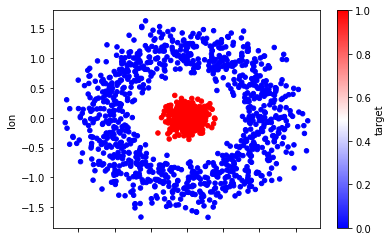

In [6]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

In [7]:
# এখানে সাপোর্ট ভেক্টর মেশিন ব্যবহার করছি
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# প্লটিং এর কিছু লাইব্রেরি ব্যবহার করছি, plot_decision_regions লাইব্রেরিটা বেশ ভালো
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

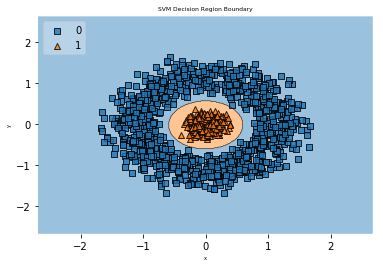

In [9]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('SVM Decision Region Boundary', size=6)
plt.show()

মেশিন লার্নিং এ ফিচার ক্রসের সুবিধা থাকলেও আমার পছন্দের ব্যাপার হচ্ছে মডেলে নন লিনিয়ারিটি ঢুকানো। মডেলে নন লিনিয়ারিটি ঢুকাতে গেলে নিউরাল নেটওয়ার্ক ভালো একটা উপায়। আমরা একটা ছবি আঁকি লিনিয়ার মডেলের। তিনটে ইনপুট ফিচার। ইনপুট ফিচারের সাথে ওয়েটকে যোগ করে নিয়ে এলাম আউটপুটে। আপনার কি মনে হয় এভাবে মডেলে নন-লিনিয়ারিটি ঢুকানোর সম্ভব? আপনি বলুন।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/linear_net.png"> 

চিত্রঃ তিনটা ইনপুট যাচ্ছে একটা নিউরাল নেটওয়ার্কে  

পরের ছবিতে আমরা একটা হিডেন লেয়ার যোগ করি। হিডেন লেয়ারের অর্থ হচ্ছে এর মধ্যে কিছু মাঝামাঝি ভ্যালু যোগ করা। আগের ইনপুট লেয়ার থেকে এই লেয়ারে তাদের ওয়েটগুলোর যোগফল পাঠিয়ে দিচ্ছে সামনের লেয়ারে। এখানে সামনে লেয়ার হচ্ছে আউটপুট। ইনপুট থেকে ওয়েট যোগ করে সেগুলোকে পাঠিয়ে দিচ্ছে আউটপুট লেয়ারে। ইংরেজিতে আমরা বলি 'ওয়েটেড সাম অফ প্রিভিয়াস নোডস'। এখনো কি মডেলটা লিনিয়ার? মডেল অবশ্যই লিনিয়ার হবে কারণ আমরা এ পর্যন্ত যা করেছি তা সব লিনিয়ার ইনপুটগুলোকেই একসাথে করেছি। নন-লিনিয়ারিটি যোগ করার মতো এখনো কিছু করিনি। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/1hidden.png"> 
চিত্রঃ যোগ করলাম প্রথম হিডেন লেয়ার, লিনিয়ারিটি বজায় থাকবে?

এরকম করে আমরা যদি আরেকটা হিডেন লেয়ার যোগ করি তাহলে কি হবে? নন লিনিয়ার কিছু হতে পারে? না। আমরা যতই লেয়ার বাড়াই না কেন এই আউটপুট হচ্ছে আসলে ইনপুটের একটা ফাংশন। মানে হচ্ছে ইনপুটের ওয়েট গুলোর একটা যোগফল। যাই যোগফল হোকনা কেন সবই লিনিয়ার। এই যোগফল আসলে আমাদের নন লিনিয়ার সমস্যা মেটাবে না। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/2hidden.png"> 
চিত্রঃ যোগ করলাম দ্বিতীয় হিডেন লেয়ার, লিনিয়ারিটি বজায় থাকবে?

একটা নন লিনিয়ার সমস্যাকে মডেল করতে গেলে আমাদের মডেলে যোগ করতে হবে নন লিনিয়ার কিছু ফাংশন। ব্যাপারটা আমাদেরকে নিজেদেরকেই ঢোকাতে হবে। সবচেয়ে মজার কথা হচ্ছে আমরা এই ইনপুটগুলোকে পাইপ করে হিডেন লেয়ারের শেষে একটা করে নন লিনিয়ার ফাংশন যোগ করে দিতে পারি। এই ছবিটা দেখুন। আমরা এক নাম্বার হিডেন লেয়ার এর পর একটা করে নন লিনিয়ার ফাংশন যোগ করে দিয়েছি যাতে সেটার আউটপুট সে পাঠাতে পারে দ্বিতীয় হিডেন লেয়ারে। এই ধরনের নন লিনিয়ার ফাংশনকে আমরা এর আগেও বলেছি অ্যাক্টিভেশন ফাংশন। 

আমাদের পছন্দের অ্যাক্টিভেশন ফাংশন হচ্ছে রেল্যু, রেকটিফাইড লিনিয়ার ইউনিট অ্যাক্টিভেশন ফাংশন। কাজে এটা স্মার্ট, অনেকের থেকে ভালো আর সে কারণে এর ব্যবহার অনেক বেশি। ভুল হবার চান্স কম। ডায়াগ্রাম দেখলেই বুঝতে পারবেন - যদি ইনপুট শূন্য হয় তাহলে আউটপুট ০ আর ইনপুটের মান ০ থেকে বেশি হয় তাহলে সেটার আউটপুটে যাবে পরের লেয়ারে যাওয়ার জন্য। 
<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/relu.png"> 
চিত্রঃ ইনপুটের সবকিছুর 'ওয়েটেড সাম' থেকে ০ আসলে সেটাই থাকবে বেশি হলে ১, মানে পরের লেয়ারে পার  

আমরা যখন অ্যাক্টিভেশন ফাংশন যোগ করব তার সঙ্গে বেশি বেশি লেয়ার মডেলে ভালো কাজ করে। একটা নন লিনিয়ারিটি আরেকটা নন লিনিয়ারিটির উপর থাকাতে মডেল অনেক কমপ্লেক্স সম্পর্ক ধরতে পারে ইনপুট থেকে আউটপুট পর্যন্ত। মডেলের প্রতিটা লেয়ার তার অংশে কমপ্লেক্স জিনিসগুলো এক্সট্রাক্ট করতে পারে সেই কারণেই। অ্যাক্টিভেশন ফাংশন ছাড়া একটা নিউরাল নেটওয়াক আসলে আরেকটা লিনিয়ার রিগ্রেশন মডেল। এদিকে অ্যাক্টিভেশন ফাংশনে ব্যাক-প্রপাগেশন সম্ভব করে কারণ এর গ্রেডিয়েন্ট, তার এরর, ওয়েট এবং বায়াসকে আপডেট পাঠায়। শুরুর দিকের অ্যাক্টিভেশন ফাংশন হচ্ছে সিগময়েড। যার কাজ হচ্ছে যাই পাক না কেন সেটাকে ০ অথবা ১ এ পাঠিয়ে দেবে।   
<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/sigmoid.png"> 
চিত্রঃ ইনপুটের সবকিছুর 'ওয়েটেড সাম' পাল্টে দেবে ০ থেকে ১ এর মধ্যে এই সিগময়েড 

আবারো বলছি - সিগময়েড অ্যাক্টিভেশন ফাংশন লেয়ারগুলোর ইনপুটের/আউটপুটের যোগফলকে ০ অথবা ১ এর মধ্যে ফেলে দেয়। হয় এসপার না হলে ওসপার। লিনিয়ারিটির কোন স্কোপ থাকবে না। একটা ছবি দেখুন। ইকুয়েশন সহ। 

আমার আরেকটা পছন্দের অ্যাক্টিভেশন ফাংশন হচ্ছে সফটম্যাক্স। এটা সাধারণত আমরা ব্যবহার করি দুইয়ের বেশি ক্লাসিফিকেশন সমস্যা হ্যান্ডেল করতে। সিগময়েড ভালো যখন আমরা দুটো ক্লাসিফিকেশন করি, তবে মাল্টিপল ক্লাসিফিকেশন এর জন্য সফটম্যাক্স অসাধারণ। যখন আউটপুট লেয়ার একটার সাথে আরেকটা 'মিউচুয়ালি এক্সক্লুসিভ' হয়, মানে কোন আউটপুট একটার বেশী আরেকটার ঘরে পড়বে না তাহলে সেটা 'সফটম্যাক্'স হ্যান্ডেল করবে। আমাদের যেকোনো শার্ট অথবা হাতে লেখা MNIST ইমেজগুলো যেকোন একটা ক্লাসেই পড়বে তার বাইরে নয়।  

## ট্রেনিং/টেস্ট স্প্লিট করা 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

## একটা লজিস্টিক রিগ্রেশন করি 

আপনার মনে হচ্ছে কি হবে?

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## একটা প্লটিং দেখি 

কিছুই হয়নি।

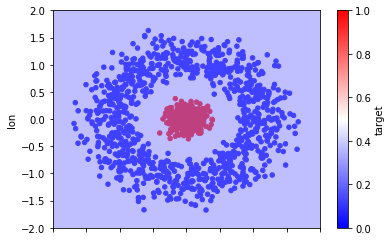

In [12]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

## ২. একদম বেসিক নিউরাল নেটওয়ার্কে দেখি
১টা ইনপুট লেয়ার, ১টা নিউরন, ১টা আউটপুট।

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
945/945 [==============================] - 1s 1ms/sample - loss: 0.6521 - accuracy: 0.6328 - val_loss: 0.6502 - val_accuracy: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 59us/sample - loss: 0.6311 - accuracy: 0.6582 - val_loss: 0.6329 - val_accuracy: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 56us/sample - loss: 0.6084 - accuracy: 0.6413 - val_loss: 0.6153 - val_accuracy: 0.6381
Epoch 4/20
945/945 [==============================] - 0s 55us/sample - loss: 0.5883 - accuracy: 0.6582 - val_loss: 0.5978 - val_accuracy: 0.6381
Epoch 5/20
945/945 [==============================] - 0s 56us/sample - loss: 0.5726 - accuracy: 0.6402 - val_loss: 0.5889 - val_accuracy: 0.6381
Epoch 6/20
945/945 [==============================] - 0s 60us/sample - loss: 0.5609 - accuracy: 0.6582 - val_loss: 0.5831 - val_accuracy

## অ্যাক্যুরেসি প্লটিং দেখি 

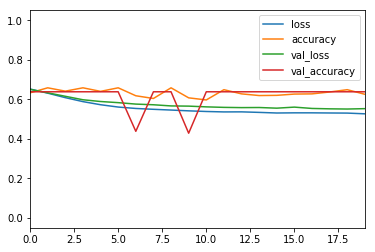

In [14]:
pd.DataFrame(result.history).plot(ylim=(-0.05, 1.05))

## ডিসিশন বাউন্ডারি কি ঠিক হলো?

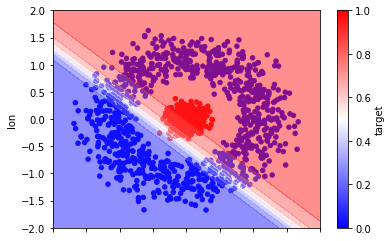

In [15]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 443us/sample - loss: 0.6591 - accuracy: 0.6095 - val_loss: 0.6347 - val_accuracy: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 63us/sample - loss: 0.5829 - accuracy: 0.6730 - val_loss: 0.5453 - val_accuracy: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 59us/sample - loss: 0.4685 - accuracy: 0.8148 - val_loss: 0.4169 - val_accuracy: 0.9810
Epoch 4/20
945/945 [==============================] - 0s 59us/sample - loss: 0.3351 - accuracy: 0.9757 - val_loss: 0.2850 - val_accuracy: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 67us/sample - loss: 0.2275 - accuracy: 0.9989 - val_loss: 0.1957 - val_accuracy: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 68us/sample - loss: 0.1613 - accuracy: 0.9989 - val_loss: 0.1434 - val_accuracy: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 64us/sample - loss: 0.1220

## একটা কনফিউশন ম্যাট্রিক্স তৈরি করি 


In [0]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [19]:
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(train_score, test_score))

Accuracy scores:
   Train:	1.0
   Test:	1.0


## নতুন ডিসিশন বাউন্ডারি, অল্প লেয়ারেই 

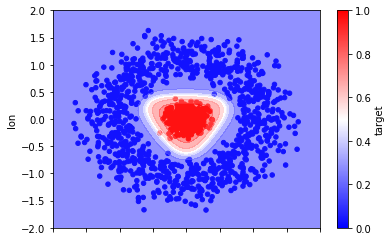

In [20]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)